In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
from math import factorial as fact
import numpy.random as rnd
%matplotlib inline

## look at distributions in wine quality dataset

In [9]:
df = pd.read_csv('data/winequality-red.csv', delimiter=';')
df3 = df[['pH', 'alcohol', 'density', 'fixed acidity']]

In [14]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [10]:
df3.describe()

,pH,alcohol,density,fixed acidity
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,3.311113,10.422983,0.996747,8.319637
std,0.154386,1.065668,0.001887,1.741096
min,2.740000,8.400000,0.990070,4.600000
25%,3.210000,9.500000,0.995600,7.100000
50%,3.310000,10.200000,0.996750,7.900000
75%,3.400000,11.100000,0.997835,9.200000
max,4.010000,14.900000,1.003690,15.900000


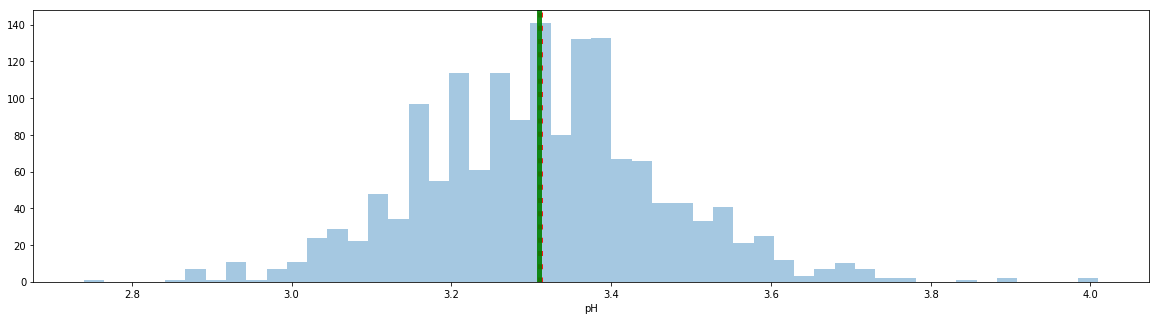

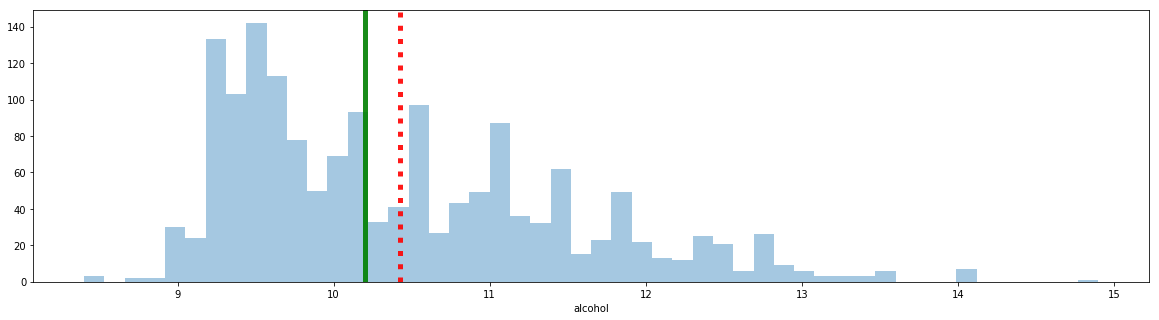

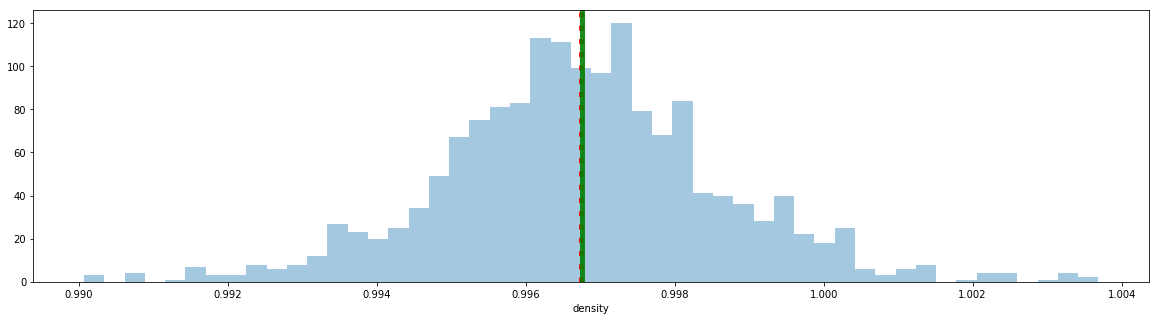

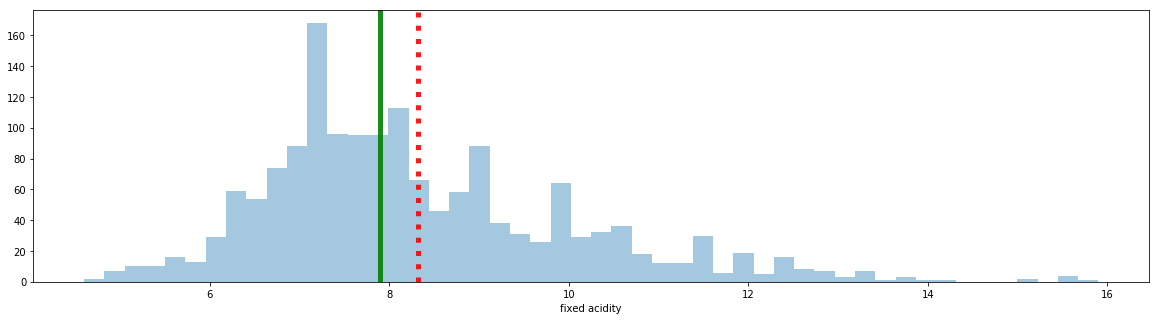

In [17]:
bins = 50
cols = df3.columns
for col in df3.columns:
    plt.figure(figsize=(20,5))
    ax = sns.distplot(df3[col], bins=bins, kde=False)
    ax.axvline(x=df3[col].mean(), ymin=0.0, ymax=1.0, color='red', ls=':', lw=5.0, alpha=0.9)
    ax.axvline(x=df3[col].median(), ymin=0.0, ymax=1.0, color='green', ls='-', lw=5.0, alpha=0.9)

## create some distributions with synthetic data

In [2]:
# Create functions:

def n_choose_k(n, k):
    return fact(n) / (fact(k)*(fact(n-k)))

def binomial(n, k, p):
    return n_choose_k(n, k) * p**k * (1-p)**(n-k)

In [18]:
# Binomial Distribution.

n = 100
p = .1
k = 2
mu = n*p

In [4]:
# Equation
p1 = binomial(n, k, p)

# Scipy Stats PMF
p2 = s.binom.pmf(k=k, n=n, p=p)

# Scipy Stats CDF
p3 = s.binom.cdf(k=k, n=n, p=p) - s.binom.cdf(k=1, n=n, p=p)
print('Formula: {:.4f}, scipy.pmf: {:.4f}, scipy.cdf: {:.4f}'.format(p1, p2, p3))

Formula: 0.0779, scipy.pmf: 0.0779, scipy.cdf: 0.0779


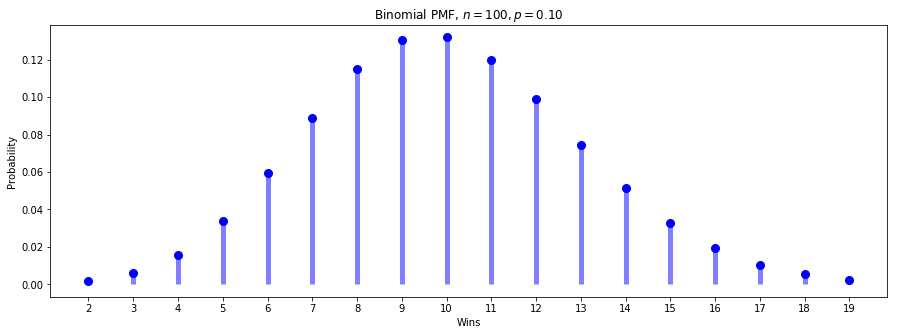

In [19]:
# Plot Binomial Distribution PMF

# Create x values
x = np.arange(s.binom.ppf(.001, n, p), s.binom.ppf(.999, n, p))

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.binom.pmf(x, n, p), 'bo', ms=8, label='binomial pmf')

# Add Vertical lines
ax.vlines(x, 0, s.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Wins')
ax.set_xticks(x)

# Set Title
ax.set_title("Binomial PMF, $n={0}, p = {1:0.2f}$".format(n, p));

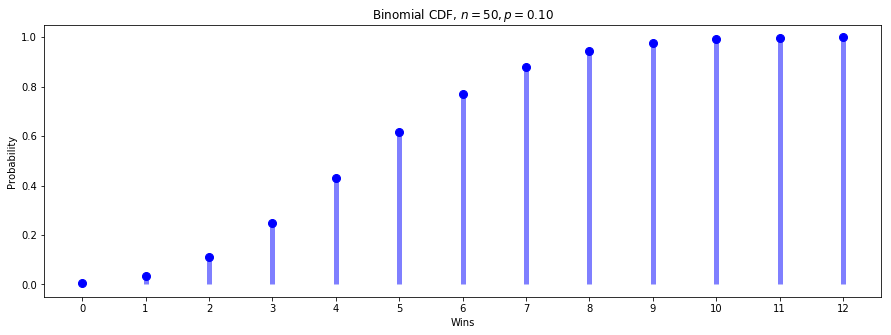

In [6]:
# Plot Binomial Distribution CDF

# Create x values
x = np.arange(s.binom.ppf(.001, n, p), s.binom.ppf(.999, n, p))

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.binom.cdf(x, n, p), 'bo', ms=8, label='binomial cdf')

# Add Vertical lines
ax.vlines(x, 0, s.binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Wins')
ax.set_xticks(x)

# Set Title
ax.set_title("Binomial CDF, $n={0}, p = {1:0.2f}$".format(n, p));

1.9210797521965035


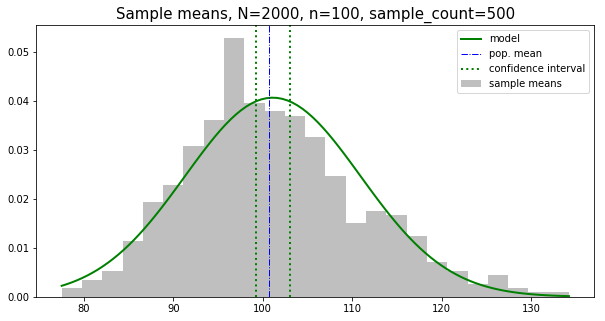

In [28]:
#population_N = 200
from scipy.stats import norm
population_scale = 100

population_N = 2000
sample_n = 100
sample_count = 500

population = rnd.exponential(population_scale, population_N)
population_mean = population.mean()
sample_means = np.array([rnd.choice(population, sample_n).mean() for _ in range(sample_count)])

var_of_sample_means = sample_means.var()
mean_of_sample_means = sample_means.mean()
std_of_sample_means = sample_means.std()

alpha = 1.96 * std_of_sample_means / np.sqrt(sample_n)

sample_means_model = norm(loc=mean_of_sample_means, scale=np.sqrt(var_of_sample_means))
model_xs = np.linspace(sample_means.min(), sample_means.max(), 100)
model_ys = sample_means_model.pdf(model_xs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(model_xs, model_ys, color='g', lw=2, label='model')
ax.hist(sample_means, bins=25, density=True, color='k', alpha=0.25, label='sample means')
ax.set_title('Sample means, N={}, n={}, sample_count={}'.format(population_N, sample_n, sample_count), size=15)
ax.axvline(population_mean, 0, 1.0, lw=1, color='b', ls='-.', label='pop. mean')
ax.axvline(mean_of_sample_means - alpha, 0, 1.0, lw=2, color='g', ls=':', label='confidence interval')
ax.axvline(mean_of_sample_means + alpha, 0, 1.0, lw=2, color='g', ls=':')
ax.legend(loc='best')

print(alpha)